<a href="https://colab.research.google.com/github/melany-rios/Reducci-n-de-Desperdicios-de-Productos-en-Supermercados/blob/main/Reduccion_de_Desperdicios_de_Productos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧾 **Proyecto: Reducción de Desperdicio de Productos en Supermercados**

El presente proyecto forma parte de la materia **Gestión de Proyectos de Servicios Profesionales**, dentro de la **Tecnicatura en Ciencia de Datos e Inteligencia Artificial**.  

Su objetivo principal es **desarrollar un prototipo analítico que permita reducir el desperdicio de productos en supermercados**, optimizando la gestión de inventarios, anticipando fechas de vencimiento y fortaleciendo las acciones de donación hacia comedores comunitarios.

---

## 🏪 **Contexto**

El proyecto se sitúa en una **cadena de supermercados de la ciudad de Santiago del Estero**, compuesta por cuatro sucursales:

| Sucursal | Característica | Nivel de desperdicio | Nivel de ventas |
|-----------|----------------|----------------------|-----------------|
| Norte | Sede principal, alta rotación | Bajo | Alto |
| Este | Mayor desperdicio, baja rotación | Alto | Medio |
| Sur | Rotación media | Medio | Medio |
| Oeste | Rotación estable, menor tráfico | Medio-bajo | Medio-bajo |

Cada sucursal presenta dinámicas distintas de ventas, rotación y gestión de productos perecederos y no perecederos, lo cual permite analizar comportamientos diferenciados en el flujo de inventario.

---

## 🧠 **Enfoque de simulación de datos**

Dado que no se dispone de información real de la empresa, el proyecto utiliza **datasets sintéticos generados con Python**, con características **semi-realistas** basadas en supuestos razonables del funcionamiento de un supermercado.  

El uso de datos sintéticos permite **replicar escenarios reales** sin vulnerar la privacidad ni la confidencialidad de datos comerciales.  
Los datasets fueron creados mediante las librerías `Faker`, `Pandas` y `NumPy`, y reflejan variaciones entre sucursales, categorías de productos, fechas de vencimiento y comportamiento de ventas.

Todos los datos se exportan en formato `.csv` para su posterior análisis en **Google Colab** y visualización interactiva en **Streamlit**.

---

## 📂 **Descripción de los archivos CSV**

### 1️⃣ `ventas.csv`
Contiene el registro histórico de ventas por fecha, producto, categoría y sucursal.  
Permite analizar patrones de consumo, productos de alta/baja rotación y desempeño comercial.  
**Columnas:**  
`id_venta`, `fecha`, `producto`, `categoria`, `sucursal`, `cantidad`, `precio_unitario`

---

### 2️⃣ `inventario.csv`
Incluye el detalle de los productos en stock junto con su fecha de vencimiento.  
Es esencial para detectar productos próximos a vencer y definir estrategias de oferta o donación.  
**Columnas:**  
`id_producto`, `producto`, `categoria`, `sucursal`, `stock`, `fecha_vencimiento`

---

### 3️⃣ `descarte.csv`
Registra los productos descartados por vencimiento, mal estado o rotura.  
Permite medir el nivel de **merma** por sucursal y categoría.  
**Columnas:**  
`id_descarte`, `producto`, `sucursal`, `fecha`, `cantidad`, `motivo`

---

### 4️⃣ `proveedores.csv`
Reúne información sobre los proveedores de cada categoría de productos, permitiendo analizar tiempos de entrega y eficiencia logística.  
**Columnas:**  
`id_proveedor`, `nombre`, `tiempo_entrega_dias`, `categoria`

---

### 5️⃣ `comedores.csv`
Contiene el registro de organizaciones sociales y comedores comunitarios que reciben donaciones de productos aún aptos para el consumo, en el marco del programa de responsabilidad social del supermercado.  
**Columnas:**  
`id_comedor`, `nombre`, `direccion`, `zona`, `cantidad_donaciones`, `ultimo_envio`, `contacto`

---

## 🎯 **Objetivo del prototipo**

El prototipo busca **demostrar cómo el análisis de datos y la inteligencia artificial pueden mejorar la eficiencia operativa y la sostenibilidad social en supermercados**, mediante:

- Detección de productos con fechas próximas a vencerse.  
- Identificación de sucursales con mayor nivel de merma.  
- Generación de recomendaciones para **ofertas o donaciones**.  
- Cálculo de **indicadores clave (KPIs)** sobre desperdicio, ventas y donaciones.  

---

## 🌍 **Impacto esperado**

El proyecto combina **eficiencia operativa, sostenibilidad ambiental y responsabilidad social**, mostrando cómo la **Ciencia de Datos aplicada** puede generar beneficios tanto económicos como sociales.  
De esta forma, se contribuye a **reducir el desperdicio alimentario**, **optimizar recursos** y **fortalecer la imagen responsable** del supermercado ante la comunidad.


# 1. Instalación de librerías necesarias

In [6]:
!pip install pandas numpy matplotlib seaborn faker -q

# 2. Importación de librerías

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import random
from datetime import datetime, timedelta
fake = Faker('es_ES')
np.random.seed(42)

# 3. Configuración General

In [8]:
sucursales = ["Norte", "Sur", "Este", "Oeste"]
categorias = {
    "Lácteos": ["Leche Entera 1L", "Yogur Natural", "Queso Cremoso"],
    "Panificados": ["Pan Blanco", "Facturas", "Galletas dulces"],
    "Carnes": ["Carne Vacuna", "Pollo Entero", "Embutidos"],
    "Frutas y Verduras": ["Manzana", "Banana", "Lechuga"],
    "Enlatados": ["Atún en lata", "Arvejas en lata", "Maíz dulce"],
    "Secos": ["Arroz 1kg", "Fideos Spaghetti", "Harina 000"],
    "Bebidas": ["Agua Mineral 2L", "Gaseosa Cola", "Jugo Naranja"]
}

# 4. Generación de CSVs

In [9]:
# ---------- 4.1 Ventas ----------
ventas = []
start_date = datetime(2025, 9, 1)
for i in range(1000):  # muchos registros
    categoria = random.choice(list(categorias.keys()))
    producto = random.choice(categorias[categoria])
    sucursal = random.choice(sucursales)
    fecha = start_date + timedelta(days=random.randint(0, 60))
    cantidad = random.randint(5, 50)
    precio = random.choice([250, 300, 350, 400, 450])
    ventas.append([i+1, fecha.date(), producto, categoria, sucursal, cantidad, precio])

ventas_df = pd.DataFrame(ventas, columns=["id_venta", "fecha", "producto", "categoria", "sucursal", "cantidad", "precio_unitario"])
ventas_df.to_csv("ventas.csv", index=False)

# ---------- 4.2 Inventario ----------
inventario = []
for i in range(200):
    categoria = random.choice(list(categorias.keys()))
    producto = random.choice(categorias[categoria])
    sucursal = random.choice(sucursales)
    stock = random.randint(10, 200)

    # días de vencimiento por tipo
    if categoria in ["Lácteos", "Panificados", "Carnes", "Frutas y Verduras"]:
        vencimiento = datetime.now() + timedelta(days=random.randint(1, 10))
    else:
        vencimiento = datetime.now() + timedelta(days=random.randint(30, 180))

    inventario.append([i+1, producto, categoria, sucursal, stock, vencimiento.date()])

inventario_df = pd.DataFrame(inventario, columns=["id_producto", "producto", "categoria", "sucursal", "stock", "fecha_vencimiento"])
inventario_df.to_csv("inventario.csv", index=False)

# ---------- 4.3 Descarte ----------
descarte = []
for i in range(300):
    categoria = random.choice(list(categorias.keys()))
    producto = random.choice(categorias[categoria])
    sucursal = random.choices(sucursales, weights=[1,1,3,1])[0]  # más desperdicios en Este
    fecha = start_date + timedelta(days=random.randint(0, 60))
    cantidad = random.randint(1, 10)
    motivo = random.choice(["Vencimiento", "Mal estado", "Rotura"])
    descarte.append([i+1, producto, sucursal, fecha.date(), cantidad, motivo])

descarte_df = pd.DataFrame(descarte, columns=["id_descarte", "producto", "sucursal", "fecha", "cantidad", "motivo"])
descarte_df.to_csv("descarte.csv", index=False)

# ---------- 4.4 Proveedores ----------
proveedores = []
for i, cat in enumerate(categorias.keys(), start=1):
    proveedores.append([i, f"Proveedor {cat}", random.randint(2,7), cat])
proveedores_df = pd.DataFrame(proveedores, columns=["id_proveedor","nombre","tiempo_entrega_dias","categoria"])
proveedores_df.to_csv("proveedores.csv", index=False)

# ---------- 4.5 Comedores ----------
comedores = [
    [1, "Comedor Manos Solidarias", "Av. Belgrano 1200", "Este", 12, "2025-10-30", "385-4000001"],
    [2, "Hogar San Vicente", "Calle Mitre 350", "Norte", 8, "2025-10-29", "385-4000002"],
    [3, "Comedor Esperanza Viva", "Ruta 9 km 3", "Sur", 5, "2025-10-28", "385-4000003"]
]
comedores_df = pd.DataFrame(comedores, columns=["id_comedor","nombre","direccion","zona","cantidad_donaciones","ultimo_envio","contacto"])
comedores_df.to_csv("comedores.csv", index=False)

print("✅ CSVs generados correctamente:")
for f in ["ventas.csv","inventario.csv","descarte.csv","proveedores.csv","comedores.csv"]:
    print(" -", f)

✅ CSVs generados correctamente:
 - ventas.csv
 - inventario.csv
 - descarte.csv
 - proveedores.csv
 - comedores.csv


# 5. Análisis Exploratorio de Datos (EDA)

In [10]:
# 🔸 Carga de datos
ventas = pd.read_csv("ventas.csv", parse_dates=["fecha"])
inventario = pd.read_csv("inventario.csv", parse_dates=["fecha_vencimiento"])
descarte = pd.read_csv("descarte.csv", parse_dates=["fecha"])

# Drop rows with invalid dates in 'fecha_vencimiento'
inventario.dropna(subset=['fecha_vencimiento'], inplace=True)

/tmp/ipython-input-4075905114.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merma_por_sucursal, x="sucursal", y="cantidad", palette="coolwarm")


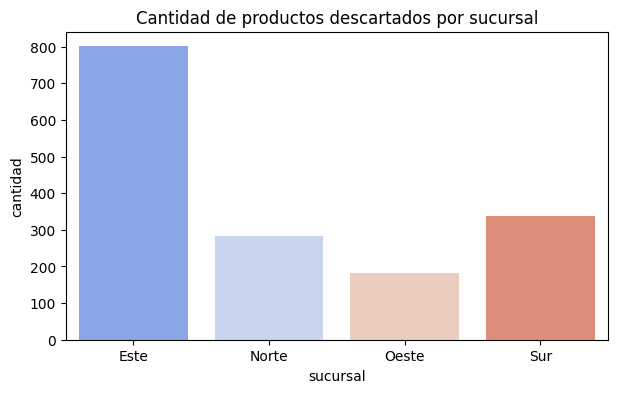

In [11]:
# 🔸 Desperdicio por sucursal
merma_por_sucursal = descarte.groupby("sucursal")["cantidad"].sum().reset_index()
plt.figure(figsize=(7,4))
sns.barplot(data=merma_por_sucursal, x="sucursal", y="cantidad", palette="coolwarm")
plt.title("Cantidad de productos descartados por sucursal")
plt.show()

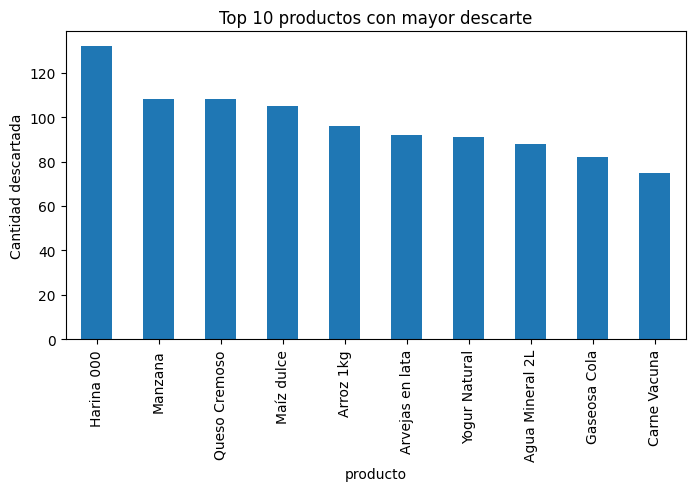

In [12]:
# 🔸 Top productos descartados
top_productos = descarte.groupby("producto")["cantidad"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_productos.plot(kind='bar')
plt.title("Top 10 productos con mayor descarte")
plt.ylabel("Cantidad descartada")
plt.show()

In [13]:
# 🔸 Detección de productos próximos a vencer (<3 días)
hoy = datetime.now()
inventario["dias_para_vencer"] = (inventario["fecha_vencimiento"] - hoy).dt.days
proximos_vencer = inventario[inventario["dias_para_vencer"] <= 3]
print("\n📦 Productos próximos a vencer (<=3 días):")
display(proximos_vencer.head(10))


📦 Productos próximos a vencer (<=3 días):


,id_producto,producto,categoria,sucursal,stock,fecha_vencimiento,dias_para_vencer
0,1,Pollo Entero,Carnes,Oeste,138,2025-11-08,1
7,8,Lechuga,Frutas y Verduras,Este,156,2025-11-10,3
11,12,Leche Entera 1L,Lácteos,Este,38,2025-11-09,2
14,15,Carne Vacuna,Carnes,Sur,26,2025-11-08,1
16,17,Galletas dulces,Panificados,Oeste,57,2025-11-08,1
17,18,Pollo Entero,Carnes,Este,18,2025-11-09,2
19,20,Lechuga,Frutas y Verduras,Norte,86,2025-11-07,0
22,23,Yogur Natural,Lácteos,Norte,82,2025-11-07,0
25,26,Lechuga,Frutas y Verduras,Este,55,2025-11-09,2
27,28,Facturas,Panificados,Sur,118,2025-11-08,1


In [14]:
# 🔸 Relación ventas vs desperdicio (por sucursal)
ventas_tot = ventas.groupby("sucursal")["cantidad"].sum()
descartes_tot = descarte.groupby("sucursal")["cantidad"].sum()
comparativo = pd.concat([ventas_tot, descartes_tot], axis=1).fillna(0)
comparativo.columns = ["ventas", "descarte"]
comparativo["% desperdicio"] = (comparativo["descarte"] / comparativo["ventas"] * 100).round(2)
print("\n📊 Porcentaje estimado de desperdicio por sucursal:")
display(comparativo)


📊 Porcentaje estimado de desperdicio por sucursal:


,ventas,descarte,% desperdicio
sucursal,,,
Este,6620,801,12.10
Norte,7445,283,3.80
Oeste,6717,183,2.72
Sur,6441,338,5.25


# 6. Exporación de CSVs

In [16]:
from google.colab import files
for file in ["ventas.csv","inventario.csv","descarte.csv","proveedores.csv","comedores.csv"]:
    files.download(file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>